/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 25s 19ms/step - accuracy: 0.7544 - loss: 0.5856 - val_accuracy: 0.9290 - val_loss: 0.1880
Epoch 2/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9503 - loss: 0.1404 - val_accuracy: 0.9407 - val_loss: 0.1569
Epoch 3/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9706 - loss: 0.0846 - val_accuracy: 0.9432 - val_loss: 0.1685
Epoch 4/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9796 - loss: 0.0641 - val_accuracy: 0.9488 - val_loss: 0.1513
Epoch 5/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9847 - loss: 0.0519 - val_accuracy: 0.9435 - val_loss: 0.1920
Epoch 6/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9874 - loss: 0.0425 - val_accuracy: 0.9522 - val_loss: 0.2116
Epoch 7/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 0.9485 - val_loss: 0.2163
Epoch 8/40
1193/1193 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9933 -

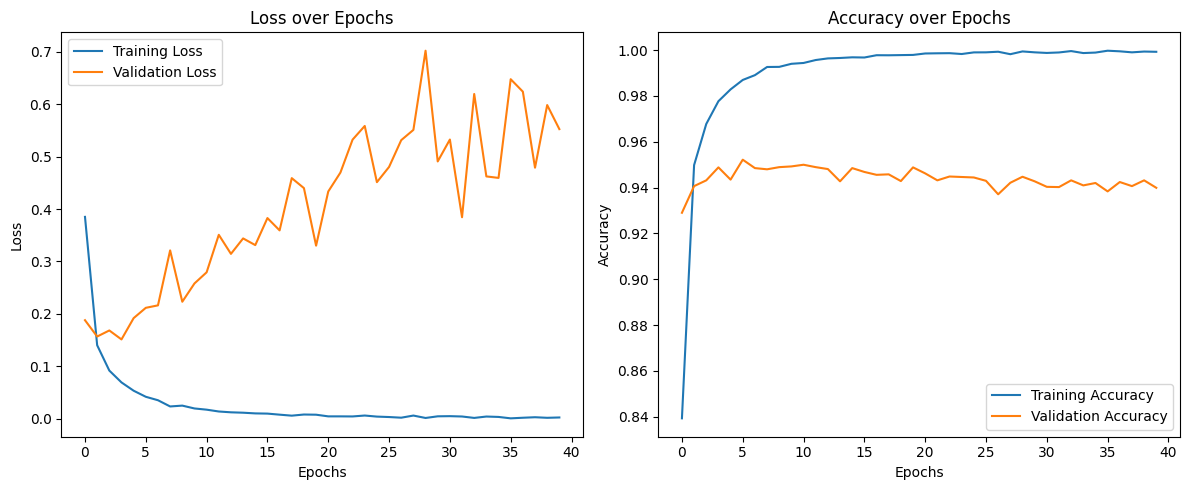

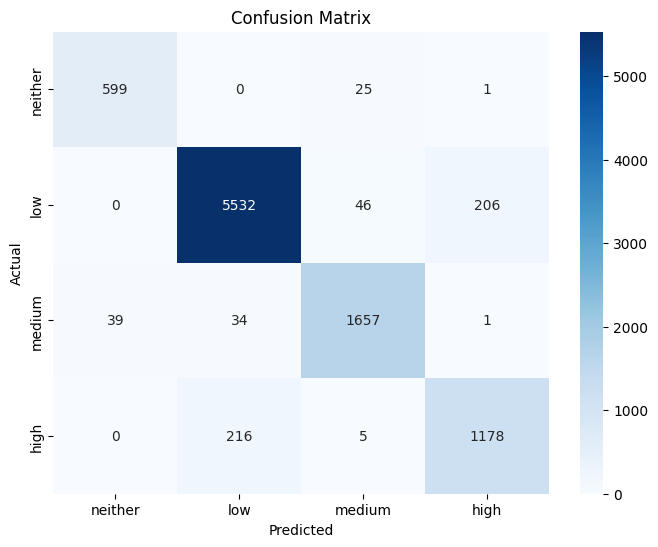

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the dataset
file_path = '/content/classified_tweet (2).csv'
df = pd.read_csv(file_path)

# Assuming the dataset has a 'Tweet' column for tweets and a 'Classification' column for classification
texts = df['Tweet'].astype(str).values
labels = pd.get_dummies(df['Classification']).values  # Convert labels to one-hot encoding for 4 classes

# Tokenize the text with a vocabulary size limit of 4500
vocab_size = 4500
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# Determine maximum text length
max_len = max(len(seq) for seq in sequences)

# Pad sequences to ensure uniform input length
X = pad_sequences(sequences, maxlen=max_len)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Create Embedding layer and LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))  # Adjusted embedding output dim
lstm_model.add(LSTM(128))
lstm_model.add(Dense(128, activation='relu'))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(4, activation='softmax'))  # 4 output classes

# Compile the model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
lstm_model.summary()

# Train the model and capture training history
history = lstm_model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

# Predict on the test set
y_pred = lstm_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Calculate overall accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Display the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plot loss and accuracy graphs
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['Classification'].unique(), yticklabels=df['Classification'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()